In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

import utils

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

# Datasets are already shuffled by sklearn
# Thanks to that otherwise all training data would be of the same classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# stratification makes sure that both train and test sets have the same proportion of classes, e.g.:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
# Feature scale to make sure the data can be trained within the acceptable range of the model
sc = StandardScaler()
sc.fit(X_train)  # Estimates mean and std for each feature
X_train_std = sc.transform(X_train)  # Standardizes the features in training set
X_test_std = sc.transform(X_test)  # Uses same standardization for test set, to make sure they are comparable

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# K-Nearest Neighbors (KNN)

Memorizes training data and use this to categorize new data points based on the majority vote of the k-nearest neighbors.

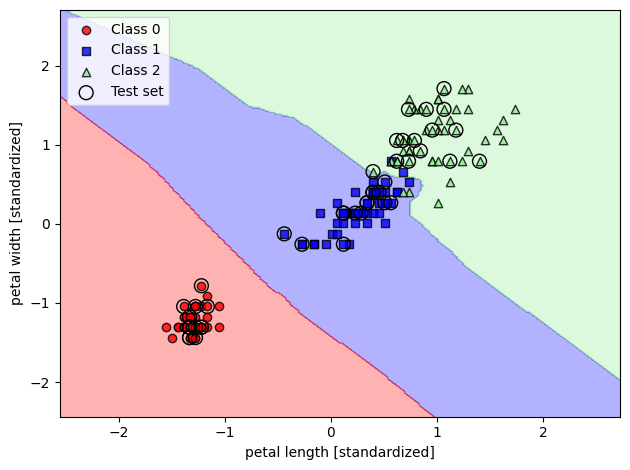

In [8]:
# KNN using a generalization of the Euclidean and Manhattan distance
# it becomes Euclidean distance for p=2 and Manhattan distance for p=1
# Smaller k (n_neighbors) tends to overfit
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
# Important to use standardized data so each features contributes equally to the distance function
# KNN suffers the curso-of-dimensionality, which is when the number of dimensions is so large that
# cause the data to be too sparse. Then techniques like PCA can help reduce overfitting problems in
# this kind of model.
knn.fit(X_train_std, y_train)

utils.plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()